# **Passo 1: Instalar as Bibliotecas**

**Antes de começar a análise, precisamos instalar os pacotes necessários**

In [12]:
# Instalar bibliotecas
install.packages('ExpDes.pt')  # Pacote para análises estatísticas experimentais
install.packages('readxl')      # Pacote para ler arquivos do Excel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ExpDes.pt"):
“installation of package ‘ExpDes.pt’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”


**📌 ExpDes.pt: Facilita análises experimentais como ANOVA e Testes de Médias.**

**📌 readxl: Permite a importação de arquivos do Excel para o R.**

# **Passo 2: Importar as Bibliotecas**

**Após a instalação, carregamos as bibliotecas para usá-las no código.**

In [13]:
# Importar Bibliotecas
library('ExpDes.pt')
library('readxl')

**📌 library() carrega os pacotes para serem utilizados no ambiente do R.**

# **Passo 3: Importar os Dados**

**Agora, importamos o arquivo Excel que contém os dados do experimento. Aqui, vamos importar direto do nosso computador**

In [23]:
# Importando os dados
dados <- read_excel('/content/mini_curso_dic.xlsx')

**📌 read_excel() lê arquivos do Excel. O caminho do arquivo deve estar correto.**

**❗ Dica: Se o arquivo estiver no Google Drive, primeiro ele precisa ser carregado para a pasta correta.**


# **Passo 4: Visualizar os Dados**

**É sempre importante verificar os dados antes de realizar análises.**

In [24]:
# Ler os primeiros registros do dataset
head(dados)

tratamento,repeticao,altura,diametro,volume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
sabia_1,1,6.0,9.54,0.004495619
sabia_1,2,6.2,9.23,0.004494520
sabia_1,3,6.1,10.18,0.004877166
sabia_1,4,6.3,9.10,0.004502688
sabia_1,5,6.4,9.10,0.004574159
sabia_1,6,6.2,9.29,0.004523736


**📌 head() mostra as primeiras linhas do conjunto de dados.**

# **Passo 5: Resumo Estatístico dos Dados**

**Podemos obter estatísticas descritivas rapidamente com a função summary().**

In [25]:
# Resumo estatístico dos dados
summary(dados)

  tratamento          repeticao        altura         diametro     
 Length:40          Min.   : 1.0   Min.   :5.700   Min.   : 8.100  
 Class :character   1st Qu.: 3.0   1st Qu.:5.975   1st Qu.: 9.075  
 Mode  :character   Median : 5.5   Median :6.900   Median : 9.520  
                    Mean   : 5.5   Mean   :6.897   Mean   : 9.586  
                    3rd Qu.: 8.0   3rd Qu.:7.775   3rd Qu.:10.018  
                    Max.   :10.0   Max.   :8.200   Max.   :10.940  
     volume        
 Min.   :0.004145  
 1st Qu.:0.004495  
 Median :0.004792  
 Mean   :0.005204  
 3rd Qu.:0.005748  
 Max.   :0.006994  

**📌 O summary() fornece informações como:**

**✔ Mínimo, máximo, média e mediana das variáveis numéricas.**

**✔ Frequência de variáveis categóricas.**

# **Passo 6: Analisar a Distribuição da Variável "Altura"**

**Para visualizar a distribuição dos dados, utilizamos um histograma.**

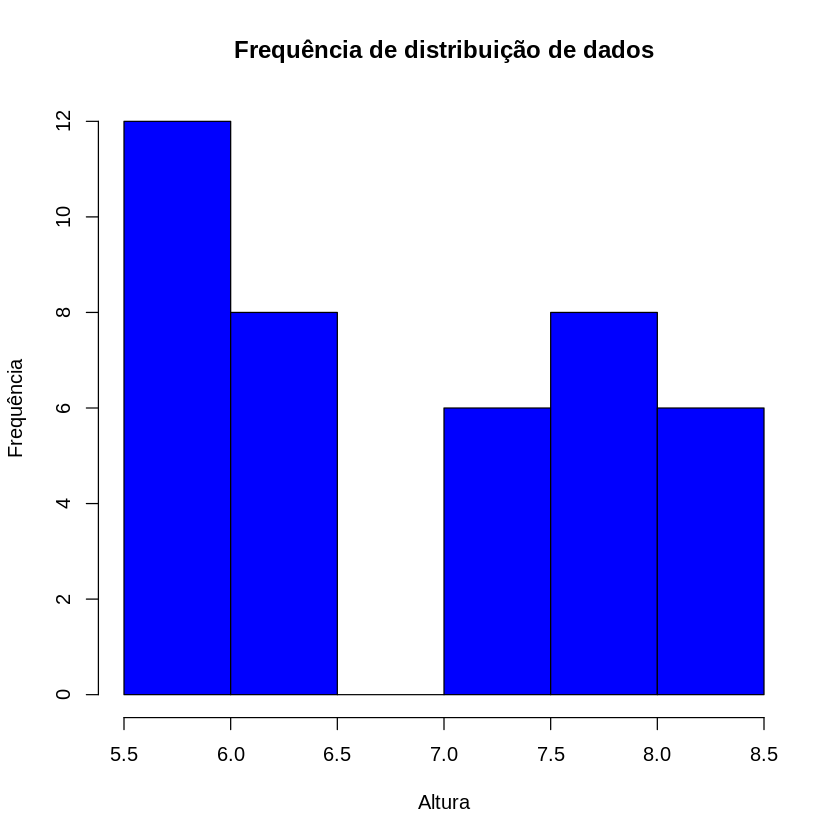

In [19]:
# Avaliar distribuição da variável "altura"
hist(dados$altura,
     main='Frequência de distribuição de dados', # Título
     xlab='Altura', # Nome do eixo X
     ylab='Frequência',  # Nome do eixo y
     col='blue', # Cor das barras
     border='black') # Cor da borda das barras

**📌 O hist() cria um histograma, permitindo verificar a normalidade dos dados.**

# **Passo 7: Boxplot da Variável**

**O boxplot é uma ferramenta útil para visualizar a dispersão dos dados e identificar possíveis outliers.**

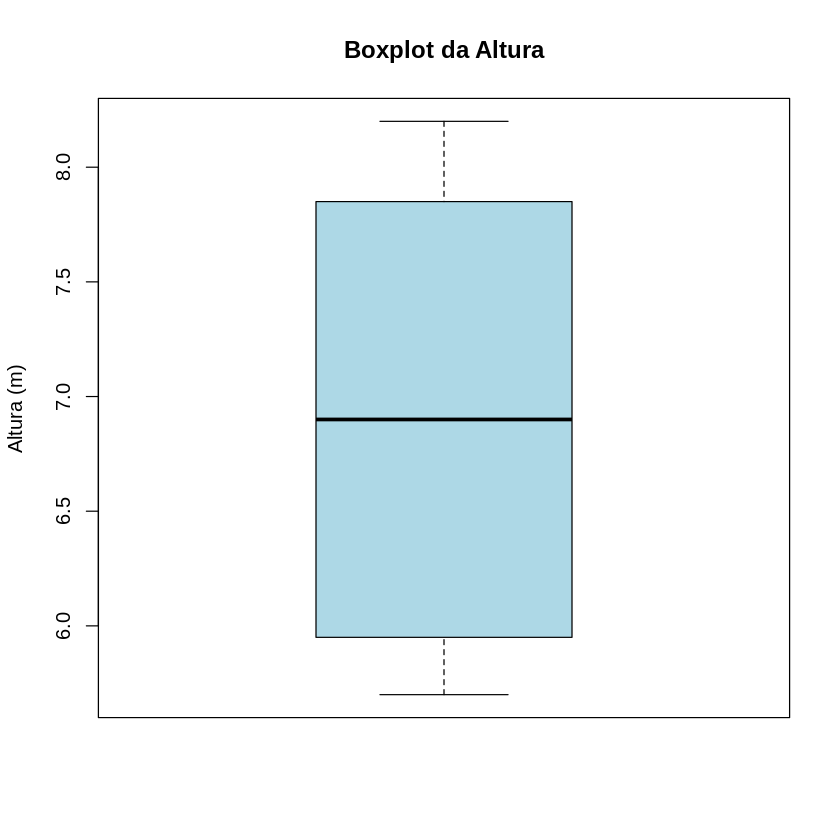

In [22]:
# Criar um boxplot para a variável "altura"
boxplot(dados$altura,
        main = "Boxplot da Altura", # Título do gráfico
        ylab = "Altura (m)", col = "lightblue", # Cor do box
        border = "black") # Cor da borda

**📌 O boxplot() ajuda a visualizar:**

**✔ A mediana da variável.**

**✔ A dispersão dos dados (quartis).**

**✔ Outliers (valores atípicos que podem influenciar a análise).**


# **Passo 8: ANOVA e Teste de Médias (DIC)**

**Agora realizamos a análise de variância e o teste de comparação de médias.**

In [27]:
# ANOVA e Teste de Tukey para DIC
dic(dados$tratamento, dados$altura,
    quali = TRUE,       # Variável qualitativa (tratamento)
    mcomp = 'tukey',    # Teste de Tukey para comparar médias
    hvar = 'bartlett',  # Teste de homogeneidade de variâncias de Bartlett
    sigT = 0.05,        # Nível de significância para o teste de médias
    sigF = 0.05)        # Nível de significância para a ANOVA

------------------------------------------------------------------------
Quadro da analise de variancia
------------------------------------------------------------------------
           GL     SQ      QM     Fc      Pr>Fc
Tratamento  3 35.289 11.7629 1111.5 1.5923e-35
Residuo    36  0.381  0.0106                  
Total      39 35.670                          
------------------------------------------------------------------------
CV = 1.49 %

------------------------------------------------------------------------
Teste de normalidade dos residuos ( Shapiro-Wilk ) 
Valor-p:  0.1534724 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------------------------------

------------------------------------------------------------------------
Teste de homogeneidade de variancia 
valor-p:  0.4867035 
De acordo com o teste de bartlett a 5% de significancia, as variancias podem ser consideradas

**📌 O dic() realiza a ANOVA e o Teste de Tukey para um Delineamento Inteiramente Casualizado (DIC).**

**📌 O teste de Bartlett verifica se as variâncias entre os grupos são homogêneas (princípio da ANOVA).**

**📌 O Teste de Tukey compara as médias e indica diferenças estatísticas entre os tratamentos.**

**📌 Conclusão**

**Este código cobre desde a importação dos dados até a realização da análise estatística. Ele permite:**

**✔ Explorar os dados e verificar sua distribuição.**

**✔ Aplicar ANOVA para identificar diferenças entre os tratamentos.**

**✔ Utilizar o Teste de Tukey para determinar quais grupos diferem significativamente.**

**Agora, podemos interpretar os resultados e visualizar as diferenças entre os tratamentos! 🚀**